<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/Week09/Week09_Classification_model_SVM_Classification_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [39]:
# Menghubungkan Google Drive agar dapat mengakses dataset
# Dataset harus sudah di-upload ke Google Drive agar dapat diproses
# Menggunakan Google Colab, kita dapat mengakses dataset yang tersimpan di Google Drive
print("Menghubungkan ke Google Drive...")#
drive.mount('/content/gdrive')

In [40]:
# Mengimpor dataset "MaterialStrength.csv" dari Google Drive
# Path disesuaikan dengan lokasi file di Google Drive
print("Membaca dataset dari Google Drive...")
dataset_path = '/content/gdrive/MyDrive/DATA SET/MaterialStrength.csv'
df = pd.read_csv(dataset_path)


Membaca dataset dari Google Drive...


In [41]:
# Menampilkan lima data teratas dari dataset
# Memeriksa struktur dataset dan melihat beberapa sampel data
print("Menampilkan data sample:")
print(df.head())


Menampilkan data sample:
      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


In [42]:

# Memeriksa nilai null dan informasi dataset secara keseluruhan
# Untuk melihat apakah ada nilai kosong yang perlu diproses
print("Memeriksa nilai null dalam dataset...")
print(df.info())



Memeriksa nilai null dalam dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memo

In [43]:
# Menghapus baris yang mengandung nilai null (jika ada)
# Mengatasi data yang hilang agar tidak mengganggu hasil model
print("Menghapus nilai null dari dataset...")
df = df.dropna()

Menghapus nilai null dari dataset...


In [44]:
# Memisahkan data fitur (X) dan target (y)
# X adalah variabel bebas (fitur) dan y adalah variabel target
# Asumsikan kolom terakhir adalah kolom target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [45]:
# Mengubah target menjadi tipe kategorikal jika target adalah kontinu
# Untuk menghindari error ketika target tidak sesuai untuk klasifikasi
y = pd.cut(y, bins=2, labels=[0, 1]) if y.dtype in ['int64', 'float64'] else y

# Mengidentifikasi fitur kategorikal dan numerik
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Mengubah fitur kategorikal menjadi numerik menggunakan LabelEncoder
print("Melakukan label encoding untuk fitur kategorikal...")
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Menstandarisasi fitur numerik
print("Melakukan standardisasi fitur numerik...")
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

Melakukan label encoding untuk fitur kategorikal...
Melakukan standardisasi fitur numerik...


In [46]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
# 80% data untuk latih dan 20% data untuk uji
print("Membagi dataset menjadi train dan test...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membagi dataset menjadi train dan test...


In [47]:
# Membuat dan melatih model SVM Classification (SVC)
# Menggunakan kernel radial basis function (RBF)
print("Membuat model SVC dan melatih model...")
svm_classifier = SVC(kernel='rbf', probability=True)
svm_classifier.fit(X_train, y_train)

# Melakukan prediksi menggunakan data uji
print("Melakukan prediksi pada data uji...")
y_pred = svm_classifier.predict(X_test)

Membuat model SVC dan melatih model...
Melakukan prediksi pada data uji...


In [48]:
# Menghitung metrik evaluasi untuk model klasifikasi
# Mengukur kinerja model menggunakan metrik Akurasi, Presisi, Recall, F1, dan AUC
print("Evaluasi Model...")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_prob = svm_classifier.predict_proba(X_test)[:, 1] if len(np.unique(y)) == 2 else None
auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'

print("Akurasi:", accuracy)
print("Presisi (weighted):", precision)
print("Recall (weighted):", recall)
print("F1 Score (weighted):", f1)
print("AUC:", auc)

Evaluasi Model...
Akurasi: 0.8155339805825242
Presisi (weighted): 0.8113089134512831
Recall (weighted): 0.8155339805825242
F1 Score (weighted): 0.812030273260632
AUC: 0.902127659574468


Membuat Confusion Matrix...


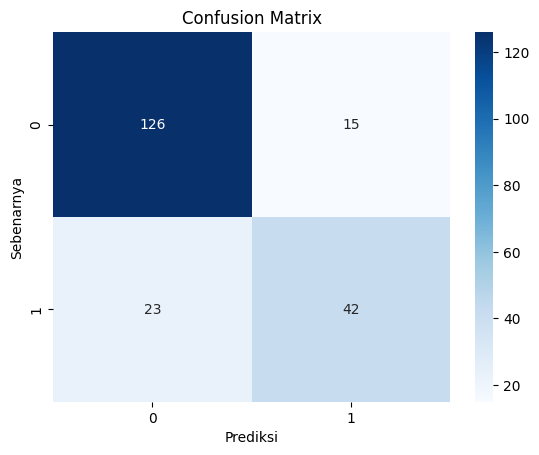

In [49]:
# Membuat confusion matrix untuk melihat performa prediksi model
print("Membuat Confusion Matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()


Membuat ROC Curve...


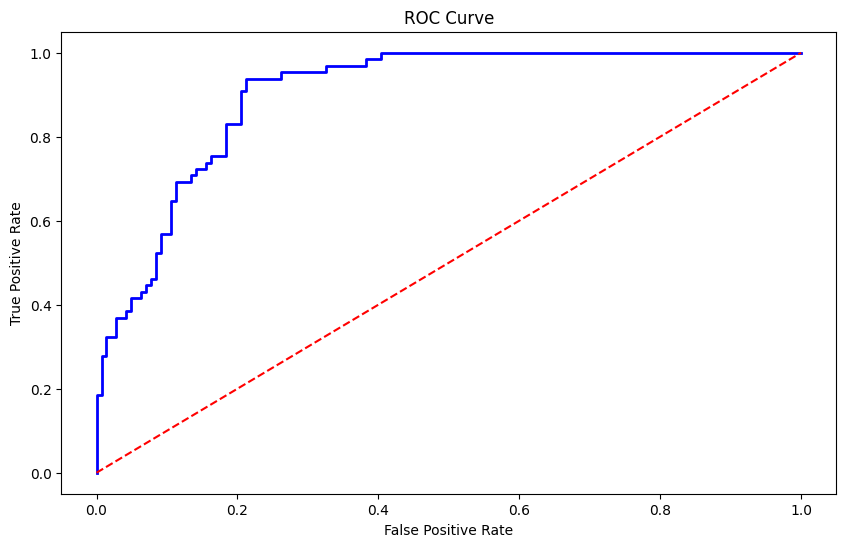

In [50]:
# Membuat ROC Curve jika klasifikasi biner
if y_prob is not None:
    print("Membuat ROC Curve...")
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
